# Polynomial Regression - Lab

## Introduction

In this lab, you'll practice your knowledge on adding polynomial terms to your regression model! 

## Objectives

You will be able to:

* Determine if polynomial regression would be useful for a specific model or set of data
* Create polynomial terms out of independent variables in linear regression

## Dataset

For this lab you'll be using some generated data:

In [1]:
# Run this cell without changes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('sample_data.csv')
df.head()

,x,y
0,0.000000,0.942870
1,0.121212,-2.261629
2,0.242424,3.100749
3,0.363636,-0.285446
4,0.484848,-1.012210


Let's check out a scatter plot of `x` vs. `y`: 

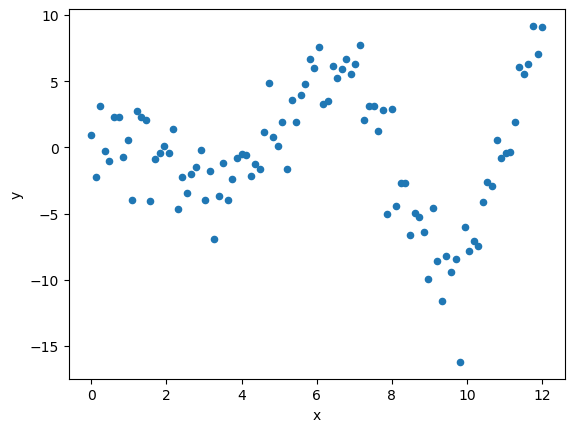

In [2]:
# Run this cell without changes
df.plot.scatter(x="x", y="y");

You will notice that the data is clearly of non-linear shape. Begin to think about what degree polynomial you believe will fit it best.

You will fit several different models with different polynomial degrees, then plot them in the same plot at the end.

In [3]:
# Your code here - import StatsModels and separate the data into X and y
import statsmodels.api as sm
y = df['y']
X = df[['x']]

## Build and Evaluate a Quadratic Model

This model should include a constant, `x`, and `x` squared. You can use `pandas` or `PolynomialFeatures` to create the squared term.

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly_2 = PolynomialFeatures(2)
X_quad = poly_2.fit_transform(X)

squared_results = sm.OLS(y, X_quad).fit()

In [5]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values
print(f"""
Adjusted R-Squared: 
{squared_results.rsquared}

Intercept and Coefficients: 
{squared_results.params}

P-values: 
{squared_results.pvalues}
""")


Adjusted R-Squared: 
0.004854279604931344

Intercept and Coefficients: 
const    0.112675
x1      -0.074425
x2      -0.001839
dtype: float64

P-values: 
const    0.938055
x1       0.893974
x2       0.967420
dtype: float64



In [6]:
# Your written answer here - summarize findings
"""
This model explains 0.5% of the variance in y.

None of the constant or coefficients are statisticall significant.

This is not an effective model.
"""

'\nThis model explains 0.5% of the variance in y.\n\nNone of the constant or coefficients are statisticall significant.\n\nThis is not an effective model.\n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
This is not a good model. Because we have multiple terms and are explaining so little of the variance in `y`, we actually have a negative adjusted R-Squared.

None of the coefficients are statistically significant at an alpha of 0.05
    
</details>

## Build and Evaluate a 4th Degree Polynomial Model

In other words, the model should include $x^0$ (intercept), $x^1$, $x^2$, $x^3$, and $x^4$ terms.

At this point we recommend importing and using `PolynomialFeatures` if you haven't already!

In [7]:
# Your code here - prepare 4th degree polynomial data and fit a model
poly_4 = PolynomialFeatures(4)
X_4 = poly_4.fit_transform(X)

X_4_results = sm.OLS(y, X_4).fit()

In [8]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values
print(f"""
Adjusted R-Squared: 
{X_4_results.rsquared}

Intercept and Coefficients: 
{X_4_results.params}

P-values: 
{X_4_results.pvalues}
""")


Adjusted R-Squared: 
0.584299942334003

Intercept and Coefficients: 
const     5.858958
x1      -12.640647
x2        5.380178
x3       -0.756345
x4        0.033265
dtype: float64

P-values: 
const    1.995047e-04
x1       1.738988e-10
x2       3.340296e-14
x3       1.715785e-16
x4       7.408453e-18
dtype: float64



In [9]:
# Your written answer here - summarize findings
"""
This model explains 58% of the variance in y, which is a great increase from the first model.

All of the constant and coefficients are statistically significant acording to their p-values, so we can extract some useful 
information from this model.
"""

'\nThis model explains 58% of the variance in y, which is a great increase from the first model.\n\nAll of the constant and coefficients are statistically significant acording to their p-values, so we can extract some useful \ninformation from this model.\n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
This is much better. We are explaining 57-58% of the variance in the target and all of our coefficients are statistically significant at an alpha of 0.05.
    
</details>

## Build and Evaluate an 8th Degree Polynomial Model

This model should include $x^0$ through $x^8$.

In [10]:
# Your code here - prepare 8th degree polynomial data and fit a model
poly_8 = PolynomialFeatures(8)
X_8 = poly_8.fit_transform(X)

X_8_results = sm.OLS(y, X_8).fit()

In [11]:
# Your code here - evaluate (adjusted) R-Squared and coefficient p-values
print(f"""
Adjusted R-Squared: 
{X_8_results.rsquared}

Intercept and Coefficients: 
{X_8_results.params}

P-values: 
{X_8_results.pvalues}
""")


Adjusted R-Squared: 
0.8335045884345312

Intercept and Coefficients: 
const    0.633500
x1      -3.119707
x2       7.206895
x3      -5.951494
x4       2.041504
x5      -0.335904
x6       0.027639
x7      -0.001063
x8       0.000014
dtype: float64

P-values: 
const    0.683776
x1       0.618134
x2       0.371163
x3       0.199162
x4       0.144776
x5       0.157523
x6       0.225536
x7       0.357352
x8       0.554141
dtype: float64



In [12]:
# Your written answer here - summarize findings
"""
This model explains 83% of the variance in y. However, none of the constant or coefficients are statistically significant
according to their pvalues. Therefore, I would not use this model to extract information about the coefficients. 
"""

'\nThis model explains 83% of the variance in y. However, none of the constant or coefficients are statistically significant\naccording to their pvalues. Therefore, I would not use this model to extract information about the coefficients. \n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
Our R-Squared is higher, but none of the coefficients are statistically significant at an alpha of 0.05 any more. If what we care about is an inferential understanding of the data, this is too high a degree of the polynomial.
    
</details>

## Plot All Models

Build a single plot that shows the raw data as a scatter plot, as well as all of the models you have developed as line graphs. Make sure that everything is labeled so you can tell the different models apart!

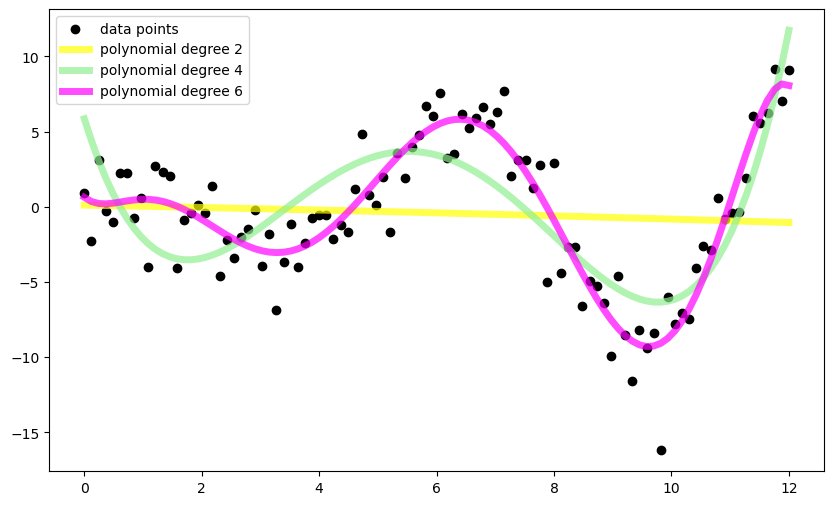

In [13]:
# Your code here

fig, ax = plt.subplots(figsize=(10, 6))

models = [squared_results, X_4_results, X_8_results]
data = [X_quad, X_4, X_8]
colors = ['yellow', 'lightgreen', 'magenta']

ax.scatter(X, y, label="data points", color="black")
for i, model in enumerate(models):
    ax.plot(
        X, # plot same x values for every model
        model.predict(data[i]), # generate predictions using relevant preprocessed data
        label=f"polynomial degree {(i + 1)*2}",   # degree happens to be 2 times (i + 1)
        color=colors[i], # select color from list declared earlier
        linewidth=5,
        alpha=0.7
    )
    
ax.legend();

### Interpret Findings

Based on the metrics as well as the graphs, which model do you think is the best? Why?

In [ ]:
# Your written answer here
"""
I believe the model with polynomial degree 4 is the best choice. 

I would not choose the quadratic because is has such a low adjusted r-squared value.

"""

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>
    
The quadratic model (polynomial degree 2) is definitely not the best based on all of the evidence we have. It has the worst R-Squared, the coefficient p-values are not significant, and you can see from the graph that there is a lot of variance in the data that it is not picking up on.

Our visual inspection aligns with the worse R-Squared for the 4th degree polynomial compared to the 8th degree polynomial. The 4th degree polynomial is flatter and doesn't seem to capture the extremes of the data as well.
    
However if we wanted to interpret the coefficients, then only the 4th degree polynomial has statistically significant results. The interpretation would be challenging because of the number of terms, but we could apply some calculus techniques to describe inflection points.

Overall it appears that this dataset is not particularly well suited to an inferential linear regression approach, even with polynomial transformations. So the "best" model could be either the 4th or 8th degree polynomial depending on which aspect of the model is more important to you, but either way it will be challenging to translate it into insights for stakeholders.
    
</details>

## Summary

Great job! You now know how to include polynomials in your linear models as well as the limitations of applying polynomial regression. 